## Einführung in die Analyse der durchschnittlichen Zugverspätungen in Minuten

In diesem Beispiel analysieren wir die durchschnittlichen Verspätungen verschiedener Zugarten. Dafür wird zunächst eine CSV-Datei mit Verspätungsdaten eingelesen und die durchschnittliche Verspätung für jede Zugart berechnet. Anschließend visualisieren wir die Ergebnisse in einem Balkendiagramm, das uns hilft, die Verspätungsstatistik je nach Zugart zu vergleichen und die durchschnittlichen Verspätungen auf einen Blick zu erkennen.

### Code-Beschreibung

1. **Berechnung der Durchschnittsverspätungen:**  
   Der erste Codeabschnitt liest die Daten aus einer CSV-Datei ein und berechnet die durchschnittliche Verspätung pro Zugart mithilfe der Funktion `calculate_average_min_delay`. Die Option `include_zero_delay` legt fest, ob auch Zugarten ohne Verspätungen (0 Minuten) in die Analyse einbezogen werden sollen. Das Ergebnis ist eine Tabelle mit den durchschnittlichen Verspätungen pro Zugart.

2. **Visualisierung der Verspätungen:**  
   Im zweiten Abschnitt wird die `plot_min_delay`-Funktion verwendet, um die berechneten Durchschnittsverspätungen als Balkendiagramm darzustellen. Jeder Balken repräsentiert eine Zugart und zeigt die jeweilige durchschnittliche Verspätung an. Die Verspätungswerte werden zusätzlich oberhalb der Balken angezeigt, um die Werte direkt abzulesen.

#### Beispielaufruf:

```python
# Beispielaufruf der Funktion
file_path = 'out/Result_41.csv'  # Passe den Pfad hier an
average_min_delays = calculate_average_min_delay(file_path, include_zero_delay=False)  # Setze True oder False
print("Durchschnittliche Verspätungen:\n", average_delays)

# Plotten der Verzögerungen
plot_min_delay(average_min_delays)


In [ ]:
# Beispielaufruf der Funktion
file_path = 'out/Result_41.csv'  # Passe den Pfad hier an
average_min_delays = calculate_average_min_delay(file_path, include_zero_delay=False)  # Setze True oder False
print("Durchschnittliche Verspätungen:\n", average_delays)

# Plotten der Verzögerungen
plot_min_delay(average_min_delays)

### Funktion: calculate_average_min_delay

Die `calculate_average_min_delay`-Funktion berechnet die durchschnittliche Verspätung pro Zugart aus einer CSV-Datei, die Verspätungsdaten enthält.

#### Parameter:
- **file_path**: Der Pfad zur CSV-Datei, die die Daten zur Verspätung enthält. Die Datei sollte zwei Spalten haben: `'Zugart'` und `'Verspätung in Minuten'`.
- **include_zero_delay** *(optional)*: Ein boolescher Parameter, der festlegt, ob Zugarten, deren durchschnittliche Verspätung Null Minuten beträgt, in die Berechnung einbezogen werden sollen. Wenn `True`, werden auch Einträge mit `0` Minuten Verspätung berücksichtigt. Standardwert ist `True`.

#### Rückgabewert:
Die Funktion gibt ein DataFrame mit zwei Spalten zurück:
- **Zugart**: Die Art des Zuges (z.B. ICE, RE).
- **Durchschnittliche Verspätung (Minuten)**: Die durchschnittliche Verspätung der jeweiligen Zugart in Minuten.

#### Funktionsweise:
1. Prüft, ob die Datei existiert. Falls nicht, wird ein `FileNotFoundError` ausgelöst.
2. Liest die CSV-Datei ohne Header ein und benennt die Spalten in `'Zugart'` und `'Verspätung in Minuten'`.
3. Berechnet die durchschnittliche Verspätung pro Zugart für Einträge mit mehr als 0 Minuten Verspätung.
4. Ergänzt die Anzahl der Vorkommen jeder Zugart und füllt fehlende Durchschnittswerte mit `0`.
5. Falls `include_zero_delay` auf `False` gesetzt ist, werden Zugarten mit einer durchschnittlichen Verspätung von `0` aus dem Ergebnis entfernt.


In [ ]:
import pandas as pd
import os

def calculate_average_min_delay(file_path, include_zero_delay=True):
    # Überprüfen, ob der Dateipfad gültig ist
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Die Datei wurde nicht gefunden: {file_path}")
    
    # CSV-Datei einlesen, ohne Header
    df = pd.read_csv(file_path, header=None, names=['Zugart', 'Verspätung in Minuten'])
    
    # Durchschnittliche Verspätung pro Zugart berechnen (nur für Verspätungen > 0)
    avg_delay = df[df['Verspätung in Minuten'] > 0].groupby('Zugart')['Verspätung in Minuten'].mean().reset_index()
    
    # Spaltennamen anpassen
    avg_delay.columns = ['Zugart', 'Durchschnittliche Verspätung (Minuten)']
    
    # Alle Zugarten im ursprünglichen DataFrame beibehalten
    all_delays = df.groupby('Zugart')['Verspätung in Minuten'].count().reset_index()
    all_delays.columns = ['Zugart', 'Anzahl']

    # Zusammenführen der Durchschnittswerte mit der Anzahl
    result = pd.merge(all_delays, avg_delay, on='Zugart', how='left')

    # Füllen der fehlenden Durchschnittswerte mit 0
    result['Durchschnittliche Verspätung (Minuten)'] = result['Durchschnittliche Verspätung (Minuten)'].fillna(0)

    # Filtere das Ergebnis basierend auf dem Parameter include_zero_delay
    if not include_zero_delay:
        result = result[result['Durchschnittliche Verspätung (Minuten)'] > 0]

    return result[['Zugart', 'Durchschnittliche Verspätung (Minuten)']]

### Funktion: plot_min_delay

Die `plot_min_delay`-Funktion erstellt ein Balkendiagramm, das die durchschnittliche Verspätung pro Zugart visualisiert.

#### Parameter:
- **data**: Ein `DataFrame`, der die Daten zur Verspätung pro Zugart enthält. Der `DataFrame` muss mindestens zwei Spalten enthalten: `'Zugart'` und `'Durchschnittliche Verspätung (Minuten)'`.

#### Funktionsweise:
1. Überprüft, ob die erforderlichen Spalten (`'Zugart'` und `'Durchschnittliche Verspätung (Minuten)'`) im `DataFrame` vorhanden sind. Falls nicht, wird ein `ValueError` ausgelöst.
2. Berechnet den Maximalwert der durchschnittlichen Verspätung und setzt die y-Achsen-Grenze auf 10 % über diesem Wert, um Platz für die Anzeige der Verspätungswerte über den Balken zu schaffen.
3. Erstellt ein Balkendiagramm, das die durchschnittliche Verspätung für jede Zugart darstellt.
4. Fügt den Wert der durchschnittlichen Verspätung (mit einer Dezimalstelle und der Einheit „min“) oberhalb jedes Balkens hinzu, mit einem kleinen Abstand zum Balken.
5. Passt die y-Achse dynamisch an, sodass alle Werte und Balken gut sichtbar sind.

#### Rückgabewert:
Die Funktion gibt kein Objekt zurück, sondern zeigt das Balkendiagramm direkt an.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_min_delay(data):
    # Überprüfen, ob die erforderlichen Spalten vorhanden sind
    if not all(col in data.columns for col in ['Zugart', 'Durchschnittliche Verspätung (Minuten)']):
        raise ValueError("Die Eingabedaten müssen die Spalten 'Zugart' und 'Durchschnittliche Verspätung (Minuten)' enthalten.")
    
    # Maximalwert berechnen und 10 % hinzufügen
    y_limit = max(data['Durchschnittliche Verspätung (Minuten)']) * 1.1

    # Berechnung des 5%-Wertes des Maximalwerts für den Textabstand
    text_offset = max(data['Durchschnittliche Verspätung (Minuten)']) * 0.03

    # Balkendiagramm
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x='Zugart', y='Durchschnittliche Verspätung (Minuten)', data=data)

    # Titel und Achsenbeschriftungen
    plt.title("Durchschnittliche Verspätung pro Zugart")
    plt.xlabel("Zugart")
    plt.ylabel("Durchschnittliche Verspätung (Minuten)")

    # Werte über den Balken mit einem Abstand von 5 % des Maximalwerts anzeigen
    for bar, value in zip(ax.patches, data['Durchschnittliche Verspätung (Minuten)']):
        x = bar.get_x() + bar.get_width() / 2  # Mitte des Balkens
        y = value + text_offset  # Etwas oberhalb des Balkens
        ax.text(x, y, f"{value:.1f} min", ha='center')

    # Y-Achse auf 10 % über dem Maximalwert setzen
    plt.ylim(0, y_limit)
    plt.show()

## Einführung in die Analyse des prozentualen Anteils verspäteter Züge

In diesem Beispiel analysieren wir den prozentualen Anteil verspäteter Züge im Vergleich zur Gesamtzahl der Züge. Zunächst wird eine CSV-Datei mit Verspätungsdaten eingelesen, um zu berechnen, wie viele Züge verspätet sind und diesen Anteil als Prozentsatz darzustellen. Anschließend visualisieren wir die Ergebnisse in einem Balkendiagramm, das uns hilft, den Anteil der verspäteten Züge je nach Zugart zu vergleichen und einen schnellen Überblick über die Verspätungssituation zu erhalten.

### Code-Beschreibung

1. **Berechnung des Anteils verspäteter Züge:**  
   Der erste Codeabschnitt liest die Daten aus einer CSV-Datei ein und berechnet den prozentualen Anteil der verspäteten Züge mithilfe der Funktion `calculate_percentage_delay`. Diese Funktion aggregiert die Verspätungsdaten und ermittelt den Prozentsatz der Züge, die verspätet sind. Das Ergebnis ist eine Tabelle, die den Anteil der verspäteten Züge pro Zugart zeigt.

2. **Visualisierung der Verspätungen:**  
   Im zweiten Abschnitt wird die `plot_percentage_delay`-Funktion verwendet, um die berechneten Anteile verspäteter Züge als Balkendiagramm darzustellen. Jeder Balken repräsentiert eine Zugart und zeigt den prozentualen Anteil der verspäteten Züge an. Die Werte werden zusätzlich oberhalb der Balken angezeigt, um die Lesbarkeit zu erhöhen und die Daten auf einen Blick erfassbar zu machen.

#### Beispielaufruf:

```python
# Beispielaufruf der Funktion
file_path = 'out/Result_41.csv'  # Passe den Pfad hier an
delay_percentages = calculate_percentage_delay(file_path)  # Prozentsätze berechnen
print("Prozentualer Anteil verspäteter Züge:\n", delay_percentages)

# Plotten der Prozentsätze
plot_percentage_delay(delay_percentages)


In [ ]:
# Beispielaufruf
file_path = 'out/Result_41.csv'  # Passe den Pfad hier an
delay_percentages = calculate_average_percentage_delay(file_path)  # Prozentsätze berechnen
print("Prozentualer Anteil verspäteter Züge:\n", delay_percentages)

# Plotten der Prozentsätze
plot_percentage_delay(delay_percentages)

### Funktion: calculate_average_percentage_delay

Die `calculate_average_percentage_delay`-Funktion berechnet den prozentualen Anteil verspäteter Züge pro Zugart aus einer CSV-Datei, die Verspätungsdaten enthält.

#### Parameter:
- **file_path**: Der Pfad zur CSV-Datei, die die Daten zur Verspätung enthält. Die Datei sollte zwei Spalten haben: `'Zugart'` und `'Verspätung (Minuten)'`, wobei die erste Zeile keinen Header enthält.
  
#### Rückgabewert:
Die Funktion gibt ein DataFrame mit zwei Spalten zurück:
- **Zugart**: Die Art des Zuges (z.B. ICE, IC, RE, S-Bahn).
- **Verspätet (%)**: Der prozentuale Anteil der verspäteten Züge der jeweiligen Zugart, basierend auf den Einträgen mit mehr als 0 Minuten Verspätung.

#### Funktionsweise:
1. Prüft, ob die Datei existiert. Falls nicht, wird ein `FileNotFoundError` ausgelöst.
2. Liest die CSV-Datei ohne Header ein und benennt die Spalten in `'Zugart'` und `'Verspätung (Minuten)'`.
3. Berechnet die Anzahl der verspäteten Züge und die Gesamtanzahl der Züge pro Zugart.
4. Ermittelt den prozentualen Anteil verspäteter Züge für jede Zugart.
5. Gibt ein DataFrame mit den Zugarten und dem entsprechenden Verspätungsanteil zurück.


In [ ]:
import pandas as pd

def calculate_average_percentage_delay(file_path):
    # CSV-Datei einlesen ohne Header
    df = pd.read_csv(file_path, header=None, names=['Zugart', 'Verspätung (Minuten)'])
    
    # Zähle die Gesamtzahl der Züge pro Zugart und die Anzahl der verspäteten Züge
    total_counts = df['Zugart'].value_counts()
    delayed_counts = df[df['Verspätung (Minuten)'] > 0]['Zugart'].value_counts()
    
    # Berechnung des prozentualen Anteils verspäteter Züge
    delay_percentage = (delayed_counts / total_counts * 100).fillna(0).reset_index()
    delay_percentage.columns = ['Zugart', 'Verspätet (%)']
    
    return delay_percentage

### Funktion: plot_percentage_delay

Die `plot_percentage_delay`-Funktion erstellt ein Balkendiagramm, das den prozentualen Anteil verspäteter Züge pro Zugart visualisiert.

#### Parameter:
- **delay_percentage**: Ein DataFrame, das die prozentualen Anteile verspäteter Züge pro Zugart enthält. Es sollte zwei Spalten haben: `'Zugart'` und `'Verspätet (%)'`.

#### Rückgabewert:
Die Funktion gibt keinen Rückgabewert zurück, sondern zeigt ein Balkendiagramm an.

#### Funktionsweise:
1. Erstellt eine neue Figur für das Diagramm mit einer Größe von 8x6 Zoll.
2. Zeichnet ein Balkendiagramm, das die prozentualen Anteile verspäteter Züge für jede Zugart darstellt.
3. Setzt den Titel des Diagramms sowie die Beschriftungen der X- und Y-Achsen.
4. Bestimmt den maximalen Verspätungsanteil und stellt die Y-Achse so ein, dass sie 10% höher ist als der maximale Wert, um genügend Platz für die Anzeige der Prozentwerte über den Balken zu schaffen.
5. Fügt die Prozentwerte über jedem Balken hinzu, um die Lesbarkeit zu erhöhen.
6. Zeigt das Diagramm an.


In [ ]:
import matplotlib.pyplot as plt

def plot_percentage_delay(delay_percentage):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(delay_percentage['Zugart'], delay_percentage['Verspätet (%)'], color='skyblue')
    plt.title("Prozentualer Anteil verspäteter Züge pro Zugart")
    plt.xlabel("Zugart")
    plt.ylabel("Verspätet (%)")
    
    # Setze die Y-Achse so, dass sie 10% höher ist als der maximale Wert
    max_delay = max(delay_percentage['Verspätet (%)'])
    plt.ylim(0, max_delay * 1.1)  # 10% höher als der maximale Wert
    
    # Prozentwerte über den Balken anzeigen
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.0f}%", ha='center', va='bottom')

    plt.show()

## Einführung in die Analyse der Verspätungsstatistik für eine spezifische Zugart

In diesem Beispiel untersuchen wir die Verspätungsstatistik für eine bestimmte Zugart, wie z.B. den ICE. Dabei wird eine CSV-Datei eingelesen, die die Verspätungsdaten verschiedener Zugarten enthält. Anschließend wird für die ausgewählte Zugart der Anteil der verspäteten Züge in verschiedenen Kategorien ermittelt, wie z.B. unter 10 Minuten, unter 30 Minuten usw. Der prozentuale Anteil der Züge wird in einem Balkendiagramm visualisiert, was eine übersichtliche Darstellung der Verspätungshäufigkeit ermöglicht.

### Code-Beschreibung

1. **Berechnung der Verspätungsstatistik für eine Zugart:**  
   Der erste Codeabschnitt liest die CSV-Datei ein, filtert die Daten für die angegebene Zugart und berechnet die Statistik für verspätete Züge in verschiedenen Verspätungskategorien. Falls die Zugart nicht vorhanden ist oder keine verspäteten Züge aufweist, gibt die Funktion eine entsprechende Meldung aus.

2. **Visualisierung der Verspätungsstatistik:**  
   Der zweite Codeabschnitt erstellt ein Balkendiagramm basierend auf der berechneten Statistik, wobei die einzelnen Kategorien als Balken und die prozentualen Anteile direkt über den Balken angezeigt werden. Diese Darstellung gibt einen schnellen Überblick darüber, in welchen Verspätungsintervallen die Züge der ausgewählten Zugart hauptsächlich liegen.

#### Beispielaufruf:

```python
# Beispielaufruf der Funktionen
file_path = 'out/Result_41.csv'  # Passe den Pfad zur CSV-Datei hier an
train_type = 'ICE'  # Kürzel der Zugart
statistics = delay_statistics_by_train_type(file_path, train_type)

# Plot der Verspätungsstatistik nur, wenn Daten vorhanden sind
if statistics:
    print(f"Verspätungsstatistik für {train_type}:\n", statistics)
    plot_delay_statistics(statistics, train_type)

Verspätungsstatistik für ICE:
 {'< 10 min': np.float64(15.584415584415584), '< 30 min': np.float64(9.090909090909092), '< 60 min': np.float64(39.39393939393939), '< 120 min': np.float64(19.913419913419915), '> 120 min': np.float64(16.017316017316016)}


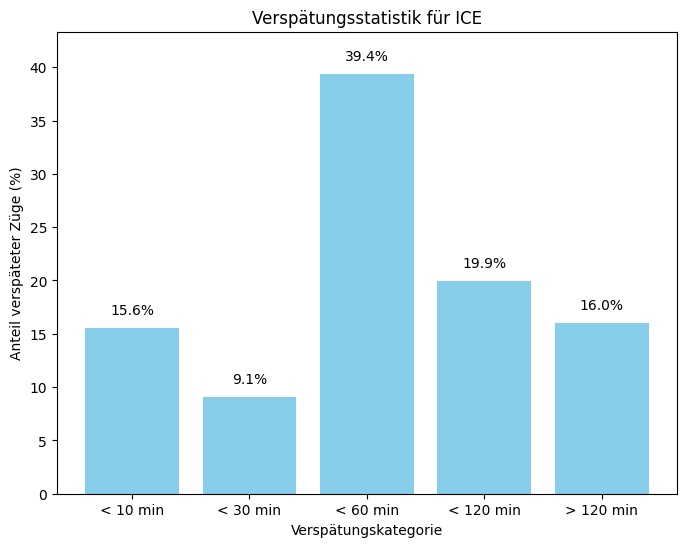

In [100]:
# Beispielaufruf der Funktionen
file_path = 'out/Result_41.csv'  # Passe den Pfad zur CSV-Datei hier an
train_type = 'ICE'  # Kürzel der Zugart
statistics = delay_statistics_by_train_type(file_path, train_type)

# Plot der Verspätungsstatistik nur, wenn Daten vorhanden sind
if statistics:
    print(f"Verspätungsstatistik für {train_type}:\n", statistics)
    plot_delay_statistics(statistics, train_type)


### Funktion: delay_statistics_by_train_type

Die Funktion `delay_statistics_by_train_type` berechnet die prozentuale Verspätungsstatistik für eine spezifische Zugart in verschiedenen Zeitkategorien.

#### Parameter:
- **file_path (str)**: Der Pfad zur CSV-Datei, die die Verspätungsdaten enthält. Die Datei sollte die Spalten `'Zugart'` und `'Verspätung in Minuten'` enthalten.
- **train_type (str)**: Das Kürzel der Zugart, für die die Verspätungsstatistik berechnet werden soll (z. B. `'ICE'`).

#### Rückgabewert:
Die Funktion gibt ein Dictionary mit den Verspätungskategorien und den jeweiligen prozentualen Anteilen zurück. Wenn die Zugart nicht vorhanden ist oder keine verspäteten Einträge existieren, wird eine entsprechende Meldung ausgegeben.

#### Funktionsweise:
1. Überprüft, ob die Datei existiert und liest die CSV-Daten ein.
2. Filtert die Daten, um nur die Einträge der gewählten Zugart zu behalten.
3. Prüft, ob es verspätete Züge dieser Zugart gibt:
4. Falls keine Einträge oder keine Verspätungen vorhanden sind, wird eine Meldung zurückgegeben.
5. Berechnet die prozentualen Anteile verspäteter Züge in den Kategorien < 10 min, < 30 min, < 60 min, < 120 min und > 120 min.
6. Gibt das Dictionary mit den Verspätungskategorien und den zugehörigen Prozentwerten zurück.

In [93]:
import pandas as pd

def delay_statistics_by_train_type(file_path, train_type):
    # CSV-Datei einlesen
    df = pd.read_csv(file_path, header=None, names=['Zugart', 'Verspätung (Minuten)'])
    
    # Filtere die Daten für die angegebene Zugart
    df_filtered = df[df['Zugart'] == train_type]
    
    # Überprüfen, ob die Zugart vorhanden ist
    if df_filtered.empty:
        print(f"Zugart '{train_type}' ist in den Daten nicht vorhanden.")
        return None

    # Filtere auf verspätete Züge (> 0 Minuten)
    df_delayed = df_filtered[df_filtered['Verspätung (Minuten)'] > 0]
    
    # Überprüfen, ob die Zugart überhaupt Verspätungen hat
    if df_delayed.empty:
        print(f"Zugart '{train_type}' weist keine verspäteten Züge auf.")
        return None

    # Gesamtanzahl der verspäteten Züge der angegebenen Zugart
    total_delays = len(df_delayed)
    
    # Berechnung des prozentualen Anteils in jeder Kategorie
    delay_stats = {
        '< 10 min': (df_delayed['Verspätung (Minuten)'] < 10).sum() / total_delays * 100,
        '< 30 min': ((df_delayed['Verspätung (Minuten)'] >= 10) & (df_delayed['Verspätung (Minuten)'] < 30)).sum() / total_delays * 100,
        '< 60 min': ((df_delayed['Verspätung (Minuten)'] >= 30) & (df_delayed['Verspätung (Minuten)'] < 60)).sum() / total_delays * 100,
        '< 120 min': ((df_delayed['Verspätung (Minuten)'] >= 60) & (df_delayed['Verspätung (Minuten)'] < 120)).sum() / total_delays * 100,
        '> 120 min': (df_delayed['Verspätung (Minuten)'] >= 120).sum() / total_delays * 100
    }
    
    return delay_stats

### Funktion: plot_delay_statistics
Die Funktion `'plot_delay_statistics'` erstellt ein Balkendiagramm zur Visualisierung der prozentualen Verspätungsstatistik für eine spezifische Zugart.

#### Parameter:
- **statistics (dict)**: Ein Dictionary mit den Verspätungskategorien und den prozentualen Anteilen. Dieses Dictionary wird typischerweise von der Funktion `'delay_statistics_by_train_type'` zurückgegeben.
- **train_type (str)**: Das Kürzel der Zugart, die im Diagrammtitel angezeigt wird.
Rückgabewert:
Die Funktion gibt keinen Rückgabewert zurück, sondern zeigt das Balkendiagramm an.

#### Funktionsweise:
1. Erstellt ein Balkendiagramm mit den Verspätungskategorien auf der x-Achse und den prozentualen Anteilen auf der y-Achse.
2. Zeigt die Prozentwerte über jedem Balken an, um die Ablesbarkeit zu verbessern.
3. Setzt die y-Achse 10 % höher als den maximalen Prozentwert, damit die Beschriftungen vollständig sichtbar sind.

In [92]:
import matplotlib.pyplot as plt

def plot_delay_statistics(delay_stats, train_type):
    # Überprüfen, ob delay_stats gültig ist
    if delay_stats is None:
        print(f"Keine Daten zum Anzeigen für Zugart '{train_type}'.")
        return
    
    # Kategorien und Werte für das Diagramm extrahieren
    categories = list(delay_stats.keys())
    values = list(delay_stats.values())
    
    # Balkendiagramm erstellen
    plt.figure(figsize=(8, 6))
    bars = plt.bar(categories, values, color='skyblue')
    plt.title(f"Verspätungsstatistik für {train_type}")
    plt.xlabel("Verspätungskategorie")
    plt.ylabel("Anteil verspäteter Züge (%)")
    plt.ylim(0, max(values) * 1.1)  # Y-Achse 10% höher setzen als der Maximalwert
    
    # Werte über den Balken anzeigen
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')

    plt.show()

# ==================================

### Zusammenhang zwischen Überfüllung und Verspätung
Falls du Daten zur Auslastung der Züge hast, erstelle einen Streudiagramm, um zu sehen, ob es einen Zusammenhang zwischen der Auslastung und der Verspätung gibt.

In [ ]:
# Beispiel-Daten für Auslastung und Verspätung
data = {
    'Auslastung': [50, 70, 80, 90, 100, 60, 85, 95],
    'Verspätung': [3, 6, 8, 12, 15, 4, 9, 13]
}
df = pd.DataFrame(data)

# Streudiagramm für Auslastung und Verspätung
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Auslastung', y='Verspätung', data=df)
plt.title("Zusammenhang zwischen Auslastung und Verspätung")
plt.xlabel("Auslastung (%)")
plt.ylabel("Verspätung (Minuten)")
plt.show()


# ==================================

In [ ]:
import matplotlib.pyplot as plt

# Simulierte Daten: Durchschnittliche Verspätung (in Minuten) pro Wochentag für die Zuglinie "S1 nach Mannheim"
wochentage = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
verspaetung_minuten = [5, 8, 6, 7, 10, 4, 3]  # Beispielwerte für durchschnittliche Verspätung in Minuten

# Liniengrafik erstellen
plt.figure(figsize=(10, 6))
plt.plot(wochentage, verspaetung_minuten, marker='o', color='b', linestyle='-')
plt.title("Durchschnittliche Verspätung der S1 nach Mannheim pro Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Durchschnittliche Verspätung (Minuten)")
plt.ylim(0, max(verspaetung_minuten) + 2)  # Y-Achse leicht über max-Wert anpassen

# Datenpunkte anzeigen
for i, v in enumerate(verspaetung_minuten):
    plt.text(wochentage[i], v + 0.3, f"{v} min", ha='center')

plt.grid(True)  # Gitter für bessere Lesbarkeit
plt.show()
